#### Name: Giridhari Lal Gupta
##### Roll Number : 2018201019
### K-NN Algorithm
##### Data set downloaded from : http://preon.iiit.ac.in/~sanjoy_chowdhury/Iris.zip http://preon.iiit.ac.in/~sanjoy_chowdhury/RobotDataset.zip

# Code Section

### Import-Libraries

In [2]:
import sys
import math
import operator 
import pandas as pd
import numpy as np
from numpy import *
import random
import matplotlib.pyplot as plt

### Train-Test Data

In [3]:
def train_test_split(df, test_size):
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))
    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)
    
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    return train_df, test_df

# Euclidean Distance

In [4]:
def euclideanDistance(instance1, instance2, attributes):
    distance = 0.0
    for attribute in range(attributes):
        distance += pow((instance1[attribute]-instance2[attribute]), 2)
    return distance

# K-Neighbours Selection

In [5]:
def neighboutsSelection(train, test, k, length):
    trainData = train.values
    distanceSet = []
    for index in range(len(train)):
        distance = euclideanDistance(trainData[index], test.values[0], length)
        distanceSet.append([trainData[index], distance])
    distanceSet.sort(key = operator.itemgetter(1))
    neighbours = []
    for index in range(k):
        neighbours.append(distanceSet[index][0])
    return neighbours

# Predict Function

In [6]:
def predictLabel(neighbours, labelIndex, uniqueValues):
    labels = {}
    for x in uniqueValues:
        labels[x] = 0
    for index in range(len(neighbours)):
        labels[neighbours[index][labelIndex - 1]] += 1
    sortedLabels = sorted(labels.items(), key = operator.itemgetter(1), reverse = True)
    return sortedLabels[0][0]

# Evaluating Test Data

In [7]:
def evaluateTestData(train, test, k, length):
    predictData = []
    for index in range(len(test)):
        neighbours = neighboutsSelection(train, test.iloc[[index]], k, length)
        predictData.append([test.iloc[[index]], predictLabel(neighbours, len(train.iloc[0]), uniqueValues)])
    return predictData

# Evaluate Predict Data

In [8]:
def evaluatePredictData(predictData, testLen, uniqueValues):
    correct = 0
    TP, FP, FN = 0, 0, 0
    for data in predictData:
        if str(data[-2][1].values[0]) == str(data[1]):
            correct += 1
            if str(uniqueValues[0]) == str(data[1]):
                TP += 1
            else:
                FP += 1
        elif not str(uniqueValues[0]) == str(data[1]):
            FN += 1
    print("Accuracy : ",correct/testLen)
    X = TP + FN
    Y = TP + FP
    Recall, Precision = 1, 1
    if X:
        Recall = TP/ X
    if Y:
        Precision = TP/ Y
    print("\nRecall is : ", Recall)
    print("\nPrecision is : ", Precision)
    if Precision or Recall:
        print("\nF1 Score is : ", (2 * (Recall * Precision))/ (Recall + Precision))

# Main Function

In [9]:
if __name__ == "__main__":
    df = pd.read_csv('../input_data/Q1/RobotDataset/Robot2', sep=" ", header=None)
    target = 1
    df = df.drop([0, 8], axis = 1)
    temp = df[1]
    df = df.drop([1], axis = 1)
    df = df.join(temp)
    train, test = train_test_split(df, test_size = 0.2)
    uniqueValues = np.unique(train[target]) 

In [10]:
predictData = evaluateTestData(train, test, 9, len(df.columns)-1)

## PART 1 : Implement a KNN classifier, Report precision, recall, f1 score and accuracy.

In [11]:
evaluatePredictData(predictData, len(test), uniqueValues)

Accuracy :  0.9166666666666666

Recall is :  1.0

Precision is :  0.6363636363636364

F1 Score is :  0.7777777777777778


## PART 2 : Plot graph to report accuracy with change in value of K.

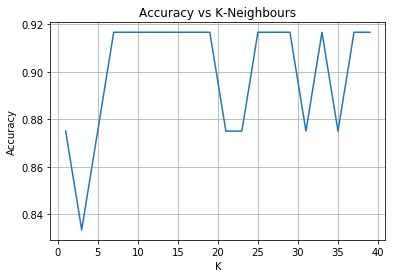

In [12]:
Accuracy = []
for x in range(1, 40, 2):
    predictData = evaluateTestData(train, test, x, len(df.columns)-1)
    correct = 0
    for data in predictData:
        if str(data[-2][1].values[0]) == str(data[1]):
            correct += 1
    acc =  correct/len(test)
    Accuracy.append(acc)
k = np.arange(1, 40, 2)
plt.plot(k, Accuracy)
plt.title('Accuracy vs K-Neighbours')
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.show()